In [1]:
%load_ext autoreload
%autoreload 2
    
import os, sys

sys.path.insert(0, "../")
print(sys.path)
#otherwise leidenalg is used in an outdated version ...

import networkx as nx
import leidenalg as la
print("la", la.version)

%autoreload 2
from mikg.kgraph import *
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

import random
random.seed(42)

import pickle

['../', '', '/opt/jhub/lib/python3.11/site-packages', '/opt/jhub/lib64/python3.11/site-packages', '/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python311.zip', '/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11', '/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/lib-dynload', '/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/site-packages']
la 0.10.2


In [2]:
kg = KGraph()
kg.load_kgraph("../data/initial_base_graph.out")

In [3]:
def to_highlight_kg(inkg, num_nodes=5):

    allcounters = defaultdict(lambda : Counter())
    specNTypes = ["geneset", "disease", "drug"]
    
    for ntype in specNTypes:

        for node in inkg.kg.nodes:
            if inkg.node_type_overlap(node, ntype):
                allcounters[ntype][node] = len(inkg.kg.in_edges(node))

    specAccept = {}
    specAcceptAll = set()
    
    for nt in allcounters:
        print(nt, allcounters[nt].most_common(num_nodes))
        sac = [x[0] for x in allcounters[nt].most_common(num_nodes)]
        specAccept[nt] = sac
        specAcceptAll.update(sac)

    accNodes = set()
    for node in inkg.kg.nodes:
        if inkg.node_type_overlap(node, specNTypes):
            if node in specAcceptAll:
                accNodes.add(node)
        else:
            accNodes.add(node)

    print(accNodes)
    hKG = kg.subset_kg(accNodes)
    _=hKG.plot_graph(figsize=(10,10))

    return hKG
    



GLI1 398 False True True
geneset [('GO:0005515', 255), ('R-HSA-162582', 193), ('GO:0005634', 142), ('GO:0005829', 135), ('GO:0005654', 134), ('GO:0005737', 133), ('SL-0086', 124), ('SL-0191', 112), ('R-HSA-5358351', 88), ('R-HSA-5610787', 75)]
disease [('Orphanet:93339', 1), ('MONDO:0029130', 1)]
{'SH3GLB1', 'DMP1', 'TRIB2', 'CCPG1', 'PSMC6', 'PSME3', 'PSMC5', 'RUNX3', 'PSMD2', 'AQP1', 'BMI1', 'XPO1', 'SGK1', 'FGF5', 'PSMB9', 'R-HSA-5610787', 'SKIC8', 'USP7', 'CCND2', 'PSMA4', 'IGFBP6', 'PSMF1', 'PRDM8', 'PROKR1', 'FAS', 'TP53', 'TIAM1', 'MYO1E', 'NKX2-8', 'ITIH3', 'CXCR4', 'NTRK3', 'PLXNA2', 'VEGFA', 'KIF3A', 'DNER', 'MCMBP', 'FA2H', 'BMP7', 'WNT10A', 'WNT10B', 'SMOC2', 'SHFM1', 'PSMD5', 'PSMB10', 'NR1H4', 'FST', 'PTCH1', 'SL-0191', 'MMP13', 'PSMC2', 'RBX1', 'SOX9', 'CFLAR', 'SLIT2', 'WNT5B', 'MMP14', 'GO:0005829', 'CTNNB1', 'DRG2', 'CLDN2', 'WNT6', 'SFRP1', 'SMO', 'ID4', 'ULK3', 'SUFU', 'SIN3B', 'FADS2', 'SMAD4', 'PSMD7', 'CCND1', 'IL6', 'PSMA7', 'NTRK2', 'IL1R2', 'ARRB1', 'INTU', 'K

/opt/jhub/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


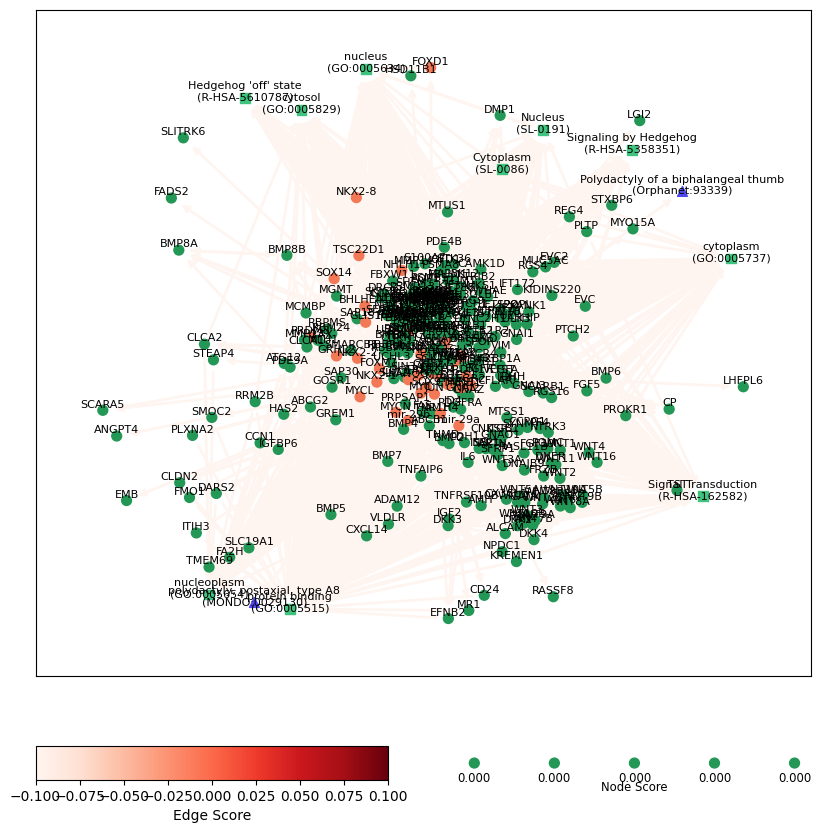

SLC5A2 75 True True True
geneset [('GO:0005886', 9), ('GO:0016020', 8), ('GO:0005515', 8), ('YOSHIMURA_MAPK8_TARGETS_UP', 7), ('GO:0016324', 6), ('R-HSA-1643685', 5), ('SL-9909', 5), ('SL-0162', 5), ('GO:0070062', 4), ('R-HSA-382551', 4)]
disease [('EFO:0001360', 5), ('EFO:0001359', 5), ('EFO:0000400', 5), ('EFO:0000537', 4), ('EFO:0001073', 4), ('EFO:1001121', 3), ('HP:0003074', 3), ('EFO:0003095', 3), ('EFO:0003144', 3), ('EFO:0000319', 2)]
drug [('CHEMBL429910', 13), ('CHEMBL2107830', 11), ('CHEMBL4594217', 7), ('CHEMBL2048484', 7), ('CHEMBL3039507', 5), ('CHEMBL4297625', 4), ('CHEMBL1770248', 4), ('CHEMBL2103802', 3), ('CHEMBL2110731', 3), ('CHEMBL2105711', 3)]
{'CHEMBL4594217', 'CHEMBL4297625', 'GO:0005886', 'SLC2A2', 'EFO:0000319', 'CHEMBL2103802', 'CHEMBL2107830', 'GO:0016020', 'EFO:1001121', 'CHEMBL2110731', 'CHEMBL2105711', 'YOSHIMURA_MAPK8_TARGETS_UP', 'SLC6A2', 'SI', 'GCG', 'R-HSA-1643685', 'ADCY7', 'EFO:0000537', 'HP:0003074', 'REN', 'GO:0070062', 'EFO:0001360', 'SL-9909', 

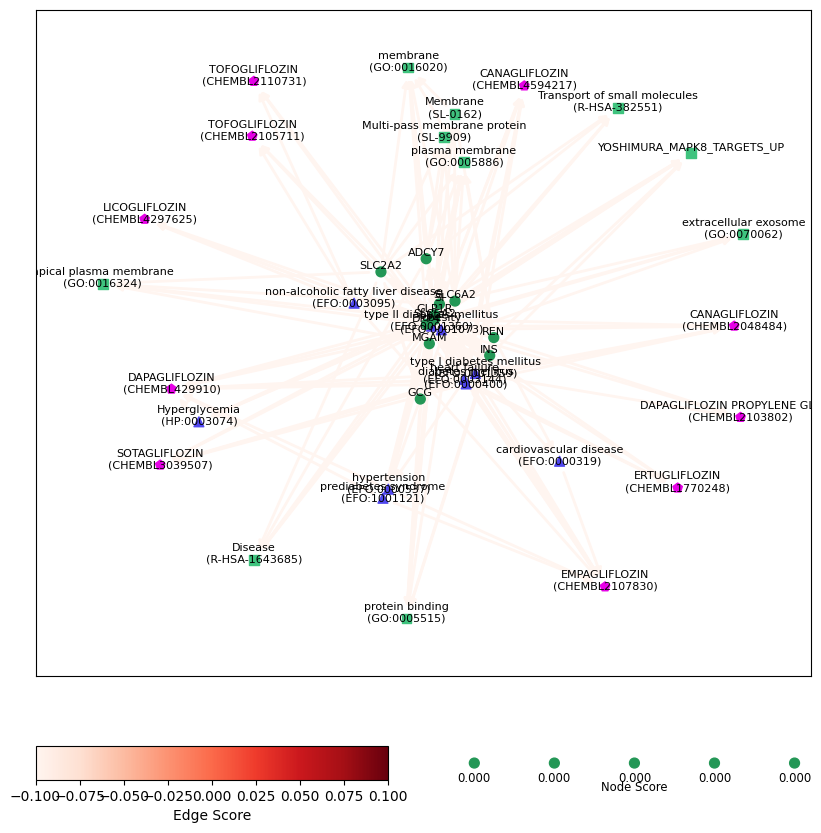

In [4]:
#for gene in ["SCARA5", "COL1A1", "POSTN", "FN1", "RUNX2", "MEOX1", "TEAD4", "COL1A1", "NFATC4", "STAT3", "HSF2", "RELA", "BACH1", "GLI2", "RELB", "TEAD1", "TGFB1", "TBX20", "KLF2", "KLF4", "ATF4", "SP2", "SP3", "FOXP2", "MEF2C", "ETV6", "NFIA", "TWIST2", "LHX9", "MKX", "PRRX1", "PRRX2", "MSX1", "TWIST1", "OSR1", "CITED2", "RUNX1T1", "FOXD1", "TBX3", "NFIX", "HOXB5", "HOXC8", "MEIS2", "HOXC6", "HOXC4"]:
#for gene in ['DCN',  'LAMA2', 'GSN', 'NEGR1', 'ABCA8', 'CDH19', 'DCN', 'RORA', 'BICC1', 'C7', "COL1A1", "TGFBR2", "ACTA2", "MMP2", "CTGF", "TPM1", "BMP7"]:
#for gene in ["COL3A1", "TIMP1", "PDGFRA", "TPM2", "PDGFBB", "ACTA1", "COL5A2", "PDGFRB", "TPM3"]:
#for gene in ["COL6A3", "TPM4", "ACTG1", "COL8A2", "TPM1", "ACTA2", "COL9A3", "TPM2", "ACTA1", "COL12A1"]:
for gene in ["GLI1", "SLC5A2"]:

    if not gene in kg.kg.nodes:
        print(gene, "-")
        continue
    targetNodes = [x for x in nx.ego_graph(kg.kg, gene, radius=1, center=True, undirected=False, distance=None).nodes]

    hasDrug = False
    hasDisease = False
    hasGeneset = False

    for node in targetNodes:
        ntypes = kg.node_types(node)
        if "drug" in ntypes:
            hasDrug = True
        if "disease" in ntypes:
            hasDisease = True
        if "geneset" in ntypes:
            hasGeneset = True

    
    print(gene, len(targetNodes), hasDrug , hasDisease , hasGeneset)
    if len(targetNodes) < 400 and hasDisease and hasGeneset:

        targetKG = kg.subset_kg(targetNodes)
        hkg = to_highlight_kg(targetKG, num_nodes=10)


In [6]:
for x in [('EFO:0001360', 5), ('EFO:0001359', 5), ('EFO:0000400', 5), ('EFO:0000537', 4), ('EFO:0001073', 4), ('EFO:1001121', 3), ('HP:0003074', 3), ('EFO:0003095', 3), ('EFO:0003144', 3), ('EFO:0000319', 2)]:
    print(x, kg.kg.nodes[x[0]]["name"])

('EFO:0001360', 5) type II diabetes mellitus
('EFO:0001359', 5) type I diabetes mellitus
('EFO:0000400', 5) diabetes mellitus
('EFO:0000537', 4) hypertension
('EFO:0001073', 4) obesity
('EFO:1001121', 3) prediabetes syndrome
('HP:0003074', 3) Hyperglycemia
('EFO:0003095', 3) non-alcoholic fatty liver disease
('EFO:0003144', 3) heart failure
('EFO:0000319', 2) cardiovascular disease


In [8]:
cur_cwd = os.getcwd()
# Note this must be stored in the directory as the notebook in Jupyter lab in order to render correctly
outfile = f"{cur_cwd}/d3blocks_graph.html"
print(outfile)

hkg.plot_graph_network(outfile=outfile, notebook=False)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Converting adjacency matrix into source-target..
[d3blocks] >INFO> Number of unique nodes: 41
[d3blocks] >INFO> Write to path: [/home/j/joppich/tmp/tmpfxmg7211/Elasticgraph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/home/j/joppich/tmp/tmpfxmg7211/Elasticgraph.html]


/mnt/raidbio/extproj/projekte/regulatory_networks/scripts/d3blocks_graph.html


[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Converting adjacency matrix into source-target..
[d3blocks] >INFO> Number of unique nodes: 41
[d3blocks] >INFO> Slider range is set to [3, 100]
[d3blocks] >INFO> Write to path: [/mnt/raidbio/extproj/projekte/regulatory_networks/scripts/d3blocks_graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/mnt/raidbio/extproj/projekte/regulatory_networks/scripts/d3blocks_graph.html]


)07)07